In [24]:
import json
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the JSON data
with open('descriptors.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to a pandas DataFrame
# Each row will have 'formula', 'descriptors', and 'e_f' columns
formulas = []
descriptors = []
e_f_values = []


for formula, values in data.items():
    if values[1] < 10 and values[1] > -10:
        descriptors.append(values[0])  # Descriptor values
        e_f_values.append(values[1])    # e_f value
        formulas.append(formula)
    else:
        pass

# Create DataFrame
df = pd.DataFrame(descriptors)
df['e_f'] = e_f_values
df['formula'] = formulas

# Split the data into features (X) and target (y)
X = df.drop(columns=['e_f', 'formula'])  # All descriptor columns
y = df['e_f']                            # Target column

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)


print("Mean Squared Error:", mse)
print("R-squared for the train : ", r2_train)
print("R-squared for the test : ", r2_test)


Mean Squared Error: 4.793130522414401
R-squared for the train :  0.8716687301775975
R-squared for the test :  0.2601460857273722


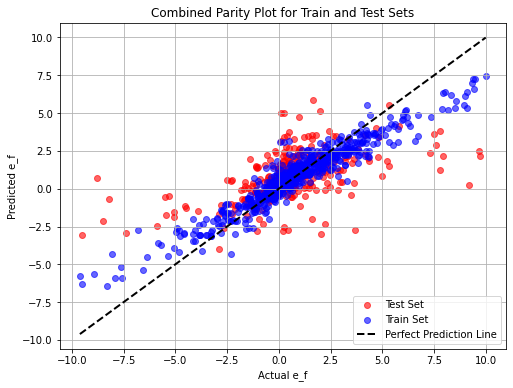

In [25]:
import matplotlib.pyplot as plt

# Combined parity plot for both train and test sets
plt.figure(figsize=(8, 6))

# Plot for test set in red
plt.scatter(y_test, y_pred, color='red', alpha=0.6, label="Test Set")
# Plot for training set in blue
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6, label="Train Set")

# 45-degree reference line (perfect prediction line)
min_val = min(y.min(), y_pred.min(), y_train.min(), y_pred_train.min())
max_val = max(y.max(), y_pred.max(), y_train.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label="Perfect Prediction Line")

# Labels, title, and legend
plt.xlabel("Actual e_f")
plt.ylabel("Predicted e_f")
plt.title("Combined Parity Plot for Train and Test Sets")
plt.legend(loc ='lower right')
plt.grid(True)
plt.show()
